# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [13]:
import pandas as pd

df = pd.read_csv('cars_hw (1).csv')
df.head()


Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000

In [14]:
df = df.dropna()


In [16]:
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.head())


   Unnamed: 0  Make_Year  Mileage_Run  Seating_Capacity   Price  Make_Datsun  \
0           1       2017        44611                 5  657000        False   
1           2       2016        20305                 5  682000        False   
2           3       2019        29540                 5  793000        False   
3           4       2017        35680                 5  414000        False   
4           5       2017        25126                 5  515000        False   

   Make_Ford  Make_Honda  Make_Hyundai  Make_Jeep  ...  Body_Type_suv  \
0      False       False         False      False  ...          False   
1      False       False          True      False  ...          False   
2      False        True         False      False  ...           True   
3      False       False         False      False  ...          False   
4      False       False          True      False  ...          False   

   No_of_Owners_2nd  No_of_Owners_3rd  Fuel_Type_petrol  Fuel_Type_petrol+cng  \

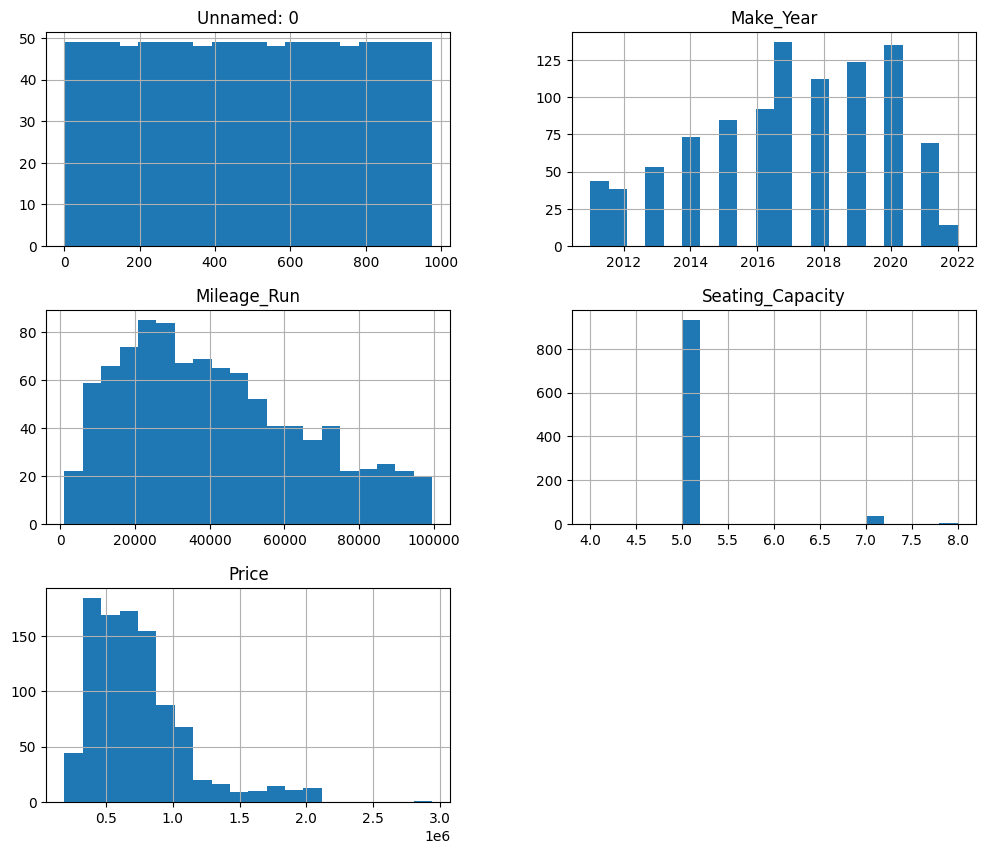

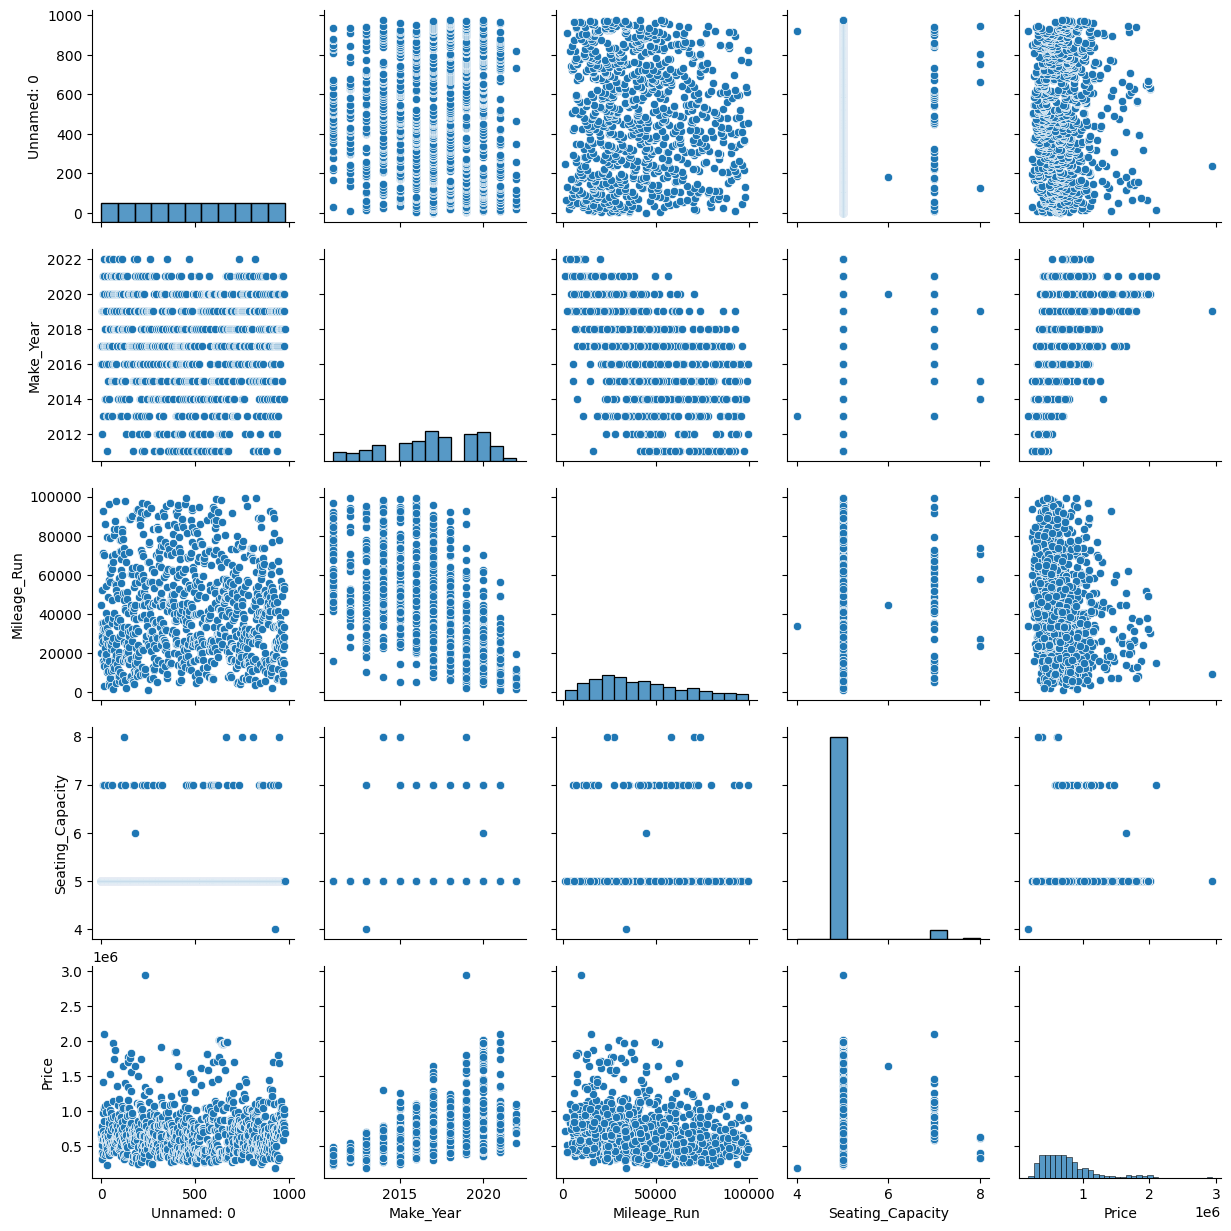

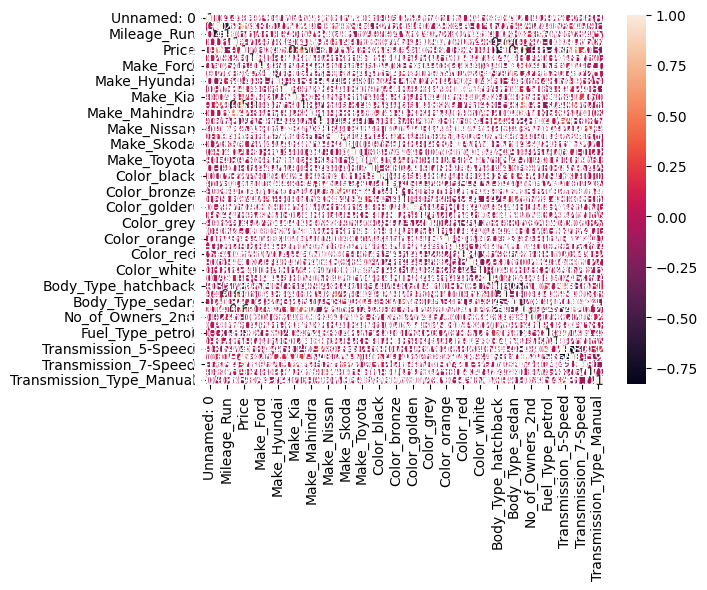

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 10), bins = 20)
plt.show()

sns.pairplot(df)
plt.show()

correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(780, 46) (196, 46) (780,) (196,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {train_rmse}, Test RMSE: {test_rmse}')
print(f'Training R²: {train_r2}, Test R²: {test_r2}')


Training RMSE: 141148.29204256515, Test RMSE: 145117.59426198687
Training R²: 0.8572664053124003, Test R²: 0.8163910583949119


In [20]:
sns.pairplot(df_encoded)
plt.show()

import statsmodels.api as sm

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

model.fit(X_poly, y_train)

y_train_poly_pred = model.predict(X_poly)
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_poly_pred))
train_r2_poly = r2_score(y_train, y_train_poly_pred)

print(f'Training RMSE with transformed features: {train_rmse_poly}, Training R²: {train_r2_poly}')


Training RMSE with transformed features: 74781.46516620807, Training R²: 0.9599352083602988


In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_train_lasso_pred = lasso.predict(X_train)
y_test_lasso_pred = lasso.predict(X_test)

train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_lasso_pred))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_lasso_pred))

train_r2_lasso = r2_score(y_train, y_train_lasso_pred)
test_r2_lasso = r2_score(y_test, y_test_lasso_pred)

print(f'Lasso Training RMSE: {train_rmse_lasso}, Test RMSE: {test_rmse_lasso}')
print(f'Lasso Training R²: {train_r2_lasso}, Test R²: {test_r2_lasso}')

selected_features = X.columns[lasso.coef_ != 0]
print(f'Selected features by Lasso: {selected_features}')


Lasso Training RMSE: 141148.29442510675, Test RMSE: 145117.69236097438
Lasso Training R²: 0.8572664004937982, Test R²: 0.8163908101568198
Selected features by Lasso: Index(['Unnamed: 0', 'Make_Year', 'Mileage_Run', 'Seating_Capacity',
       'Make_Datsun', 'Make_Ford', 'Make_Honda', 'Make_Hyundai', 'Make_Jeep',
       'Make_Kia', 'Make_MG Motors', 'Make_Mahindra', 'Make_Maruti Suzuki',
       'Make_Nissan', 'Make_Renault', 'Make_Skoda', 'Make_Tata', 'Make_Toyota',
       'Make_Volkswagen', 'Color_black', 'Color_blue', 'Color_bronze',
       'Color_brown', 'Color_golden', 'Color_green', 'Color_grey',
       'Color_maroon', 'Color_orange', 'Color_purple', 'Color_red',
       'Color_silver', 'Color_white', 'Color_yellow', 'Body_Type_hatchback',
       'Body_Type_muv', 'Body_Type_sedan', 'Body_Type_suv', 'No_of_Owners_2nd',
       'No_of_Owners_3rd', 'Fuel_Type_petrol', 'Fuel_Type_petrol+cng',
       'Transmission_5-Speed', 'Transmission_6-Speed', 'Transmission_7-Speed',
       'Transmissi

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.023e+12, tolerance: 1.089e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# RMSE value is very high suggesting a lot of error in the model's predictions
# R2 value of 0.82 suggests a strong correlation between the variables
